<a href="https://colab.research.google.com/github/advaitkrishna-official/Twitter-Data-Analysis---Tokyo-Olympics/blob/main/Twitter_DataAnalysis_on_TokyoOlympics2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the Kaggle Library :  Its done by the code given below.
! pip install kaggle

In [ ]:
# Configure the path of kaggle.json file : This step involves connecting the kaggle.json file we download from our profile.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#API to fetch the dataset from kaggle:
!kaggle datasets download -d amritpal333/tokyo-olympics-2021-tweets

Dataset URL: https://www.kaggle.com/datasets/amritpal333/tokyo-olympics-2021-tweets
License(s): other
tokyo-olympics-2021-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Extract the ZipFile/ Compressed Dataset onto the IDE:
#------------------------------------------------------
from zipfile import ZipFile # From zipfile library we are importing ZipFile function

dataset = '/content/tokyo-olympics-2021-tweets.zip'  #Path of the zipfile was pasted here and stored in the variable dataset

with ZipFile(dataset ,'r') as zip: #the function ZipFile is used to 'r' : Read the dataset at path dataset and is stored at "zip"
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


In [15]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from zipfile import ZipFile
import os

# Step 1: Download the dataset via Kaggle API (assuming this is already done)
# !kaggle datasets download -d amritpal333/tokyo-olympics-2021-tweets

# Step 2: Extract the downloaded zip file (update the path if needed)
dataset_zip = 'tokyo-olympics-2021-tweets.zip'

with ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extract the files to the /content directory
    print("Dataset extracted")

# Step 3: Check the extracted files
print(os.listdir('/content'))

# Step 4: Load the dataset into a DataFrame (adjust file name if necessary)
csv_file_path = '/content/tokyo-olympics-2021-tweets.csv'
dataset = pd.read_csv('/content/Olympics_Tokyo_tweets.csv')

# Step 5: Verify the dataset structure
print(dataset.columns)  # Check column names
print(dataset.head())    # Preview first few rows of the dataset

# Step 6: Download and initialize NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 7: Function to clean tweet text
def preprocess_text(text):
    # Remove mentions, hashtags, URLs, special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Step 8: Handle missing values and apply preprocessing
if 'text' in dataset.columns:
    dataset['text'].fillna('', inplace=True)  # Fill missing values with empty strings
    dataset['cleaned_text'] = dataset['text'].apply(preprocess_text)  # Apply preprocessing

    # Step 9: Check the cleaned text
    print(dataset[['text', 'cleaned_text']].head())
else:
    print("Column 'text' not found in the dataset.")


Dataset extracted
['.config', 'Olympics_Tokyo_tweets.csv', 'tokyo-olympics-2021-tweets.zip', 'kaggle.json', 'sample_data']


<ipython-input-15-9b18f7f5a321>:23: DtypeWarning: Columns (0,4,5,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/Olympics_Tokyo_tweets.csv')


Index(['id', 'text', 'user_screen_name', 'user_location', 'retweet_count',
       'favorited', 'favorite_count', 'user_description', 'user_created_at',
       'user_followers', 'user_friends', 'date', 'language'],
      dtype='object')
                    id                                               text  \
0  1419334065375924227  Rejected sports for the 2020 Olympics include ...   
1  1419334059424043009  Why is the Team USA men basketball team playin...   
2  1419334056161030146  @my_hive_away I'm watching kayaking on the Oly...   
3  1419334052876795905  While girls her age are still trying to figuri...   
4  1419334052180594699   @omensfromeden patty mills is at the Olympics???   

  user_screen_name                user_location retweet_count favorited  \
0      tbelmontedu                   New Jersey             0     False   
1      silverchasm                  Lynwood, CA             0     False   
2    cshaw12897514                          NaN             0     False   
3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-15-9b18f7f5a321>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['text'].fillna('', inplace=True)  # Fill missing values with empty strings


                                                text  \
0  Rejected sports for the 2020 Olympics include ...   
1  Why is the Team USA men basketball team playin...   
2  @my_hive_away I'm watching kayaking on the Oly...   
3  While girls her age are still trying to figuri...   
4   @omensfromeden patty mills is at the Olympics???   

                                        cleaned_text  
0  rejected sports 2020 olympics include bowling ...  
1  team usa men basketball team playing horrible ...  
2  im watching kayaking olympics broadcast cool s...  
3  girls age still trying figuring open account o...  
4                               patty mills olympics  


In [17]:
!pip install textblob


In [19]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the cleaned text column
dataset['sentiment'] = dataset['cleaned_text'].apply(get_sentiment)

# Add a new column to classify the sentiment as positive, negative, or neutral
dataset['sentiment_class'] = dataset['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Check the sentiment results
print(dataset[['cleaned_text', 'sentiment', 'sentiment_class']].head())


                                        cleaned_text  sentiment  \
0  rejected sports 2020 olympics include bowling ...      0.000   
1  team usa men basketball team playing horrible ...     -0.450   
2  im watching kayaking olympics broadcast cool s...      0.375   
3  girls age still trying figuring open account o...      0.050   
4                               patty mills olympics      0.000   

  sentiment_class  
0         neutral  
1        negative  
2        positive  
3        positive  
4         neutral  


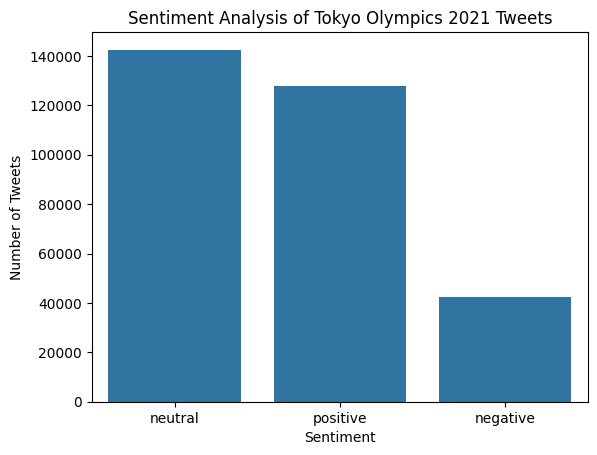

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tweets in each sentiment class
sentiment_counts = dataset['sentiment_class'].value_counts()

# Plot the sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Analysis of Tokyo Olympics 2021 Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure dataset has positive sentiments
positive_tweets = dataset[dataset['sentiment_class'] == 'positive']

# Sort by highest sentiment scores to identify peaks
positive_peaks = positive_tweets.sort_values(by='sentiment', ascending=False)

# Display top 5 positive sentiment peaks
print(positive_peaks[['cleaned_text', 'sentiment']].head())


                                             cleaned_text  sentiment
25509   congratulations dear sister bhavanidevi best w...        1.0
105573  olympics matt cooper takes closer look players...        1.0
175391                                           best sir        1.0
175355  olympics india expecting gold lovlina best wishes        1.0
175345  best wishes maam teamindia tokyo2020 olympics ...        1.0


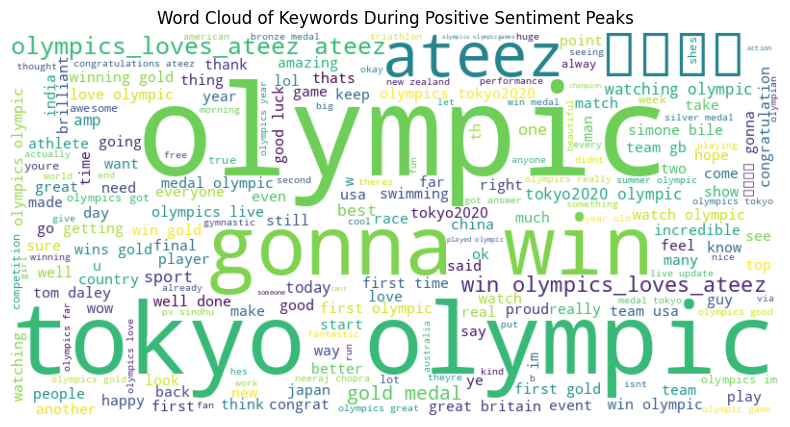

In [30]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string
text = " ".join(review for review in positive_peaks['cleaned_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Keywords During Positive Sentiment Peaks")
plt.show()


In [31]:
# Check if 'timestamp' is in dataset
if 'timestamp' in dataset.columns:
    dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

    # Filter positive tweets and sort by time
    positive_tweets = positive_tweets.sort_values(by='timestamp')

    # Plot sentiment score over time
    plt.figure(figsize=(10, 6))
    plt.plot(positive_tweets['timestamp'], positive_tweets['sentiment'], color='green', marker='o', linestyle='-')
    plt.title('Positive Sentiment Peaks Over Time')
    plt.xlabel('Time')
    plt.ylabel('Sentiment Score')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Timestamp not available for time-based analysis.")


Timestamp not available for time-based analysis.


In [32]:
# Filter tweets with negative sentiment
negative_tweets = dataset[dataset['sentiment_class'] == 'negative']

# Sort by highest negative sentiment scores to identify peaks
negative_peaks = negative_tweets.sort_values(by='sentiment', ascending=True)

# Display top 5 negative sentiment peaks
print(negative_peaks[['cleaned_text', 'sentiment']].head())


                                             cleaned_text  sentiment
174761  washington post twisties mentioned simone bile...       -1.0
193208  sackolympicsassociation chart showing worst pe...       -1.0
192963  cracknell questions return 24m investment gb r...       -1.0
191958                 whats terrible moustaches olympics       -1.0
282831        tokyo olympics boring covid racism misogyny       -1.0


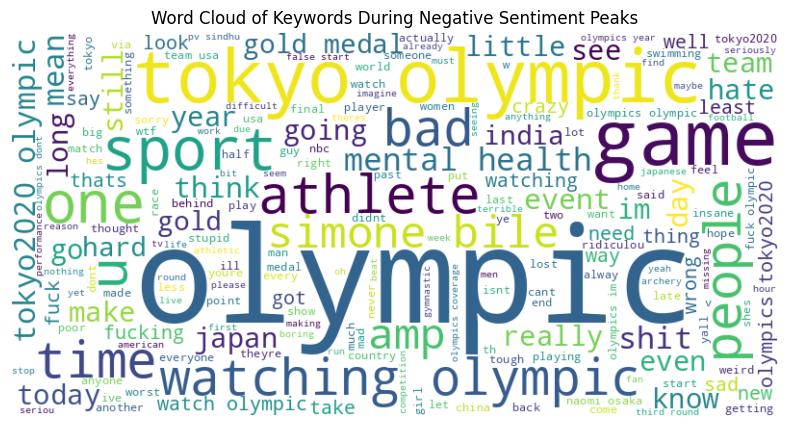

In [33]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string for negative sentiment
negative_text = " ".join(review for review in negative_peaks['cleaned_text'])

# Generate word cloud for negative sentiment peaks
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Keywords During Negative Sentiment Peaks")
plt.show()


In [34]:
# Check if 'timestamp' is in dataset
if 'timestamp' in dataset.columns:
    dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

    # Sort negative tweets by timestamp
    negative_tweets = negative_tweets.sort_values(by='timestamp')

    # Plot negative sentiment over time
    plt.figure(figsize=(10, 6))
    plt.plot(negative_tweets['timestamp'], negative_tweets['sentiment'], color='red', marker='o', linestyle='-')
    plt.title('Negative Sentiment Peaks Over Time')
    plt.xlabel('Time')
    plt.ylabel('Sentiment Score')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Timestamp not available for time-based analysis.")


Timestamp not available for time-based analysis.


In [35]:
# Get the counts of each sentiment class
sentiment_distribution = dataset['sentiment_class'].value_counts()

# Calculate the percentage of each sentiment class
sentiment_percentage = sentiment_distribution / len(dataset) * 100

# Display the distribution and percentages
print("Sentiment Class Distribution:")
print(sentiment_distribution)
print("\nSentiment Class Percentage:")
print(sentiment_percentage)


Sentiment Class Distribution:
sentiment_class
neutral     142542
positive    127763
negative     42520
Name: count, dtype: int64

Sentiment Class Percentage:
sentiment_class
neutral     45.566051
positive    40.841685
negative    13.592264
Name: count, dtype: float64


In [36]:
# Filter neutral tweets
neutral_tweets = dataset[dataset['sentiment_class'] == 'neutral']

# Display some sample neutral tweets
print("Sample Neutral Tweets:")
print(neutral_tweets[['cleaned_text']].head(10))


Sample Neutral Tweets:
                                         cleaned_text
0   rejected sports 2020 olympics include bowling ...
4                                patty mills olympics
5             one fav mario party mini games olympics
7   agree feels like focus elsewhere meaning excit...
8          ms dhoni shooting gun olympics vachestundi
9   whenever watch victory ceremonies years olympi...
10  olympics games different rights example argent...
11                         still called 2020 olympics
12  watching olympics badminton look ping pong nee...
13  highlight evening pakistani weightlifter talha...


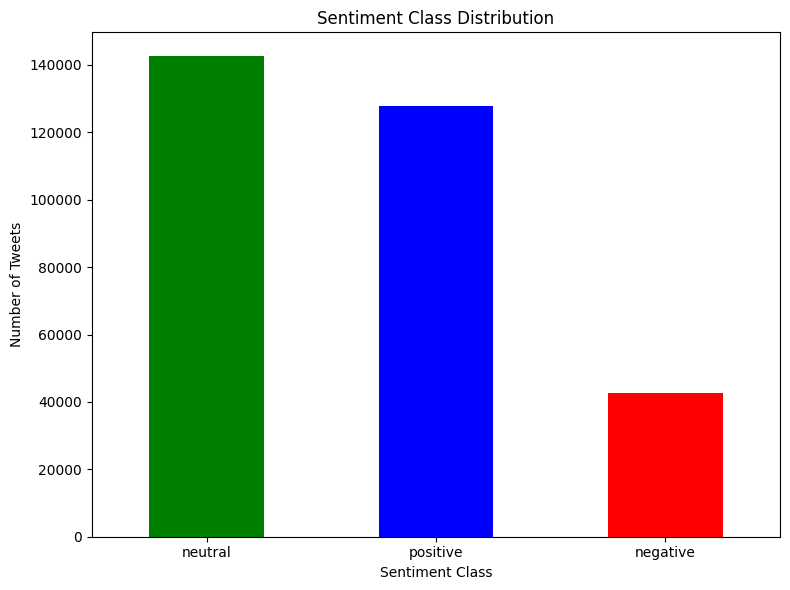

In [37]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


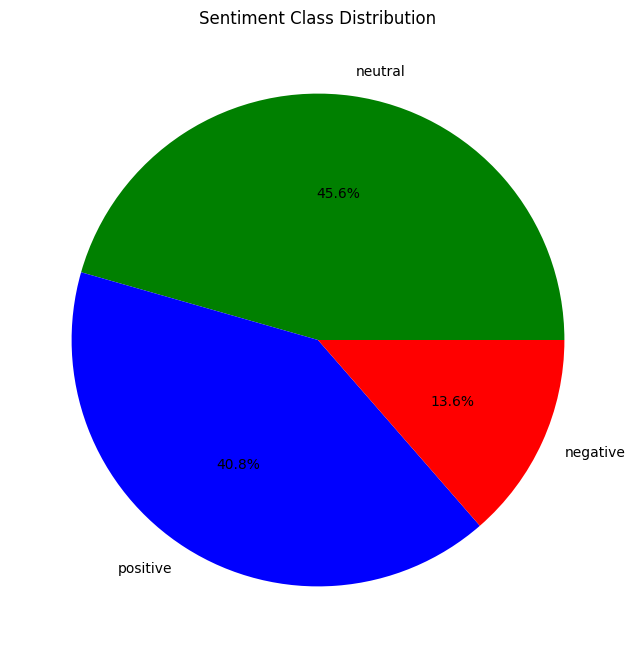

In [38]:
# Plot a pie chart of the sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Sentiment Class Distribution')
plt.show()


In [40]:
# Count tweets by location (assuming location column exists)
tweet_by_country = dataset['user_location'].value_counts()

# Display the top 10 countries with the most tweets
print("Top 10 Countries by Tweet Volume:")
print(tweet_by_country.head(10))


Top 10 Countries by Tweet Volume:
user_location
India               4309
London, England     2651
London              2421
United States       2194
New Delhi, India    1855
Australia           1477
Los Angeles, CA     1441
United Kingdom      1436
New York, NY        1400
she/her             1382
Name: count, dtype: int64


In [43]:
# Function to analyze sentiment for a specific country
def analyze_sentiment_by_country(country):
    # Filter tweets by the country from user_location
    country_tweets = dataset[dataset['user_location'].str.contains(country, case=False, na=False)]

    # Calculate sentiment distribution for the country
    sentiment_distribution = country_tweets['sentiment_class'].value_counts(normalize=True) * 100

    # Print sentiment distribution
    print(f"Sentiment Distribution in {country}:")
    print(sentiment_distribution)

# Example: Analyze sentiment for the United States, London and India
analyze_sentiment_by_country('India ')
analyze_sentiment_by_country('London, England')
analyze_sentiment_by_country('United States')


Sentiment Distribution in India :
sentiment_class
positive    44.256121
neutral     44.256121
negative    11.487759
Name: proportion, dtype: float64
Sentiment Distribution in London, England:
sentiment_class
positive    46.406421
neutral     39.730026
negative    13.863553
Name: proportion, dtype: float64
Sentiment Distribution in United States:
sentiment_class
neutral     45.804898
positive    40.144520
negative    14.050582
Name: proportion, dtype: float64


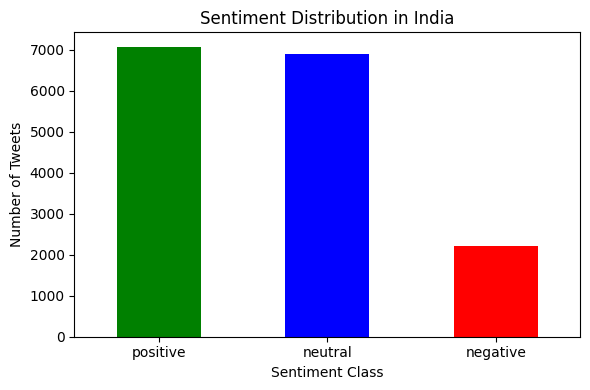

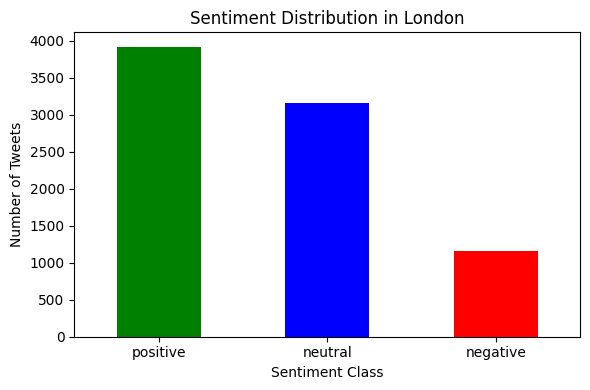

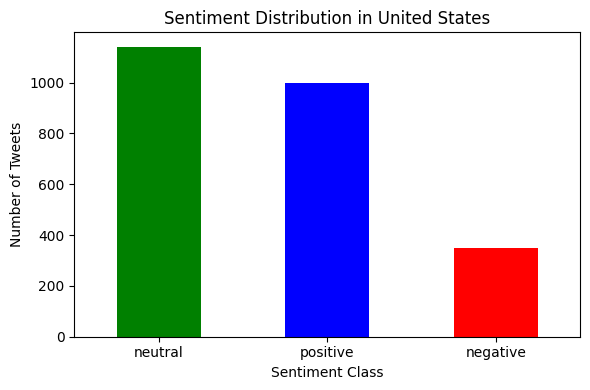

In [44]:
import matplotlib.pyplot as plt

# Function to visualize sentiment distribution for a specific country
def visualize_sentiment_by_country(country):
    # Filter tweets by the country from user_location
    country_tweets = dataset[dataset['user_location'].str.contains(country, case=False, na=False)]

    # Get sentiment class counts
    sentiment_distribution = country_tweets['sentiment_class'].value_counts()

    # Plot sentiment distribution
    plt.figure(figsize=(6, 4))
    sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(f'Sentiment Distribution in {country}')
    plt.xlabel('Sentiment Class')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Visualize sentiment distribution for United States, London , and India
visualize_sentiment_by_country('India')
visualize_sentiment_by_country('London')
visualize_sentiment_by_country('United States')


In [46]:
# Example keywords for key events
key_event_keywords = ['Caleb Dressel', 'Sifan Hassan', 'Simone Biles', 'gold medal', 'COVID', 'mental health']

# Function to filter tweets based on keywords
def filter_tweets_by_keyword(keyword):
    return dataset[dataset['cleaned_text'].str.contains(keyword, case=False, na=False)]

# Example: Get tweets related to Caleb Dressel
caleb_dressel_tweets = filter_tweets_by_keyword('Caleb Dressel')
sifan_hassan_tweets = filter_tweets_by_keyword('Sifan Hassan')
simone_biles_tweets = filter_tweets_by_keyword('Simone Biles')

# Check sample tweets for Caleb Dressel
print(caleb_dressel_tweets[['cleaned_text', 'sentiment_class']].head())


                                             cleaned_text sentiment_class
5022    tonight favorite event olympics first chance s...        positive
42955   caleb dressel team usa wins gold mens 4x100m f...        positive
115592               caleb dressel strikes stoic olympics         neutral
145172  florida gator caleb dressel first individual g...        positive
151744  caleb dressel wins 1st individual gold medal o...        positive


In [47]:
# Function to analyze sentiment for a key event
def analyze_event_sentiment(event_tweets, event_name):
    sentiment_distribution = event_tweets['sentiment_class'].value_counts(normalize=True) * 100
    print(f"Sentiment Distribution for {event_name}:")
    print(sentiment_distribution)

# Analyze sentiment for Caleb Dressel and Simone Biles
analyze_event_sentiment(caleb_dressel_tweets, 'Caleb Dressel')
analyze_event_sentiment(simone_biles_tweets, 'Simone Biles')


Sentiment Distribution for Caleb Dressel:
sentiment_class
neutral     51.428571
positive    48.571429
Name: proportion, dtype: float64
Sentiment Distribution for Simone Biles:
sentiment_class
neutral     48.081653
positive    30.250861
negative    21.667486
Name: proportion, dtype: float64


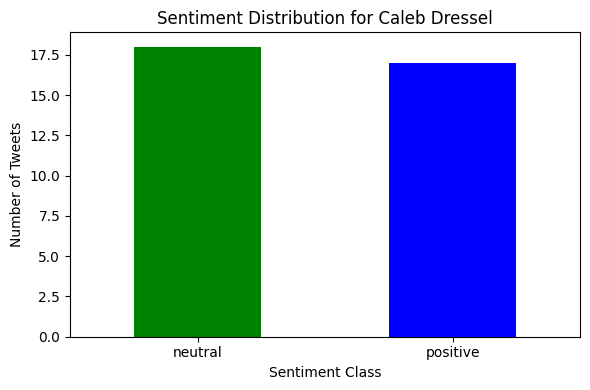

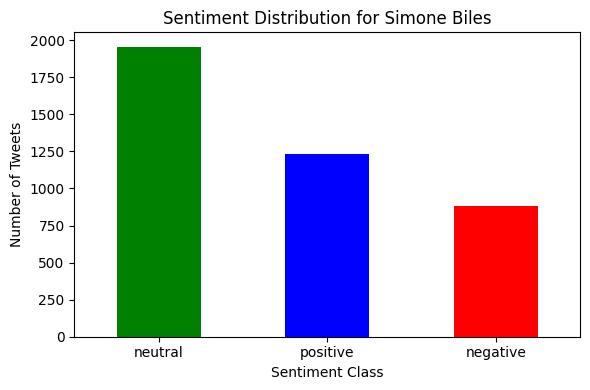

In [48]:
import matplotlib.pyplot as plt

# Function to visualize sentiment distribution for a key event
def visualize_event_sentiment(event_tweets, event_name):
    sentiment_distribution = event_tweets['sentiment_class'].value_counts()

    # Plot sentiment distribution
    plt.figure(figsize=(6, 4))
    sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
    plt.title(f'Sentiment Distribution for {event_name}')
    plt.xlabel('Sentiment Class')
    plt.ylabel('Number of Tweets')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Visualize sentiment for Caleb Dressel and Simone Biles
visualize_event_sentiment(caleb_dressel_tweets, 'Caleb Dressel')
visualize_event_sentiment(simone_biles_tweets, 'Simone Biles')


In [49]:
# Keywords related to athlete activism
activism_keywords = ['activism', 'mental health', 'protest', 'social justice', 'equality', 'rights', 'BLM', 'Simone Biles', 'Naomi Osaka']

# Function to filter tweets by activism keywords
def filter_tweets_by_activism(keyword_list):
    pattern = '|'.join(keyword_list)  # Create a pattern from the list of keywords
    return dataset[dataset['cleaned_text'].str.contains(pattern, case=False, na=False)]

# Filter the dataset for tweets mentioning athlete activism
activism_tweets = filter_tweets_by_activism(activism_keywords)

# Check sample tweets about activism
print("Sample Activism-Related Tweets:")
print(activism_tweets[['cleaned_text']].head())


Sample Activism-Related Tweets:
                                          cleaned_text
10   olympics games different rights example argent...
146  well cannot watch behind paywall eurosports go...
163  staying away everything usa olympics care acti...
262  olympics simone biles usa gymnasts outscored r...
264  naomi osaka im happy osaka better place since ...


In [50]:
# Analyze sentiment distribution for activism-related tweets
activism_sentiment_distribution = activism_tweets['sentiment_class'].value_counts(normalize=True) * 100

# Display sentiment distribution
print("Sentiment Distribution for Activism-Related Tweets:")
print(activism_sentiment_distribution)


Sentiment Distribution for Activism-Related Tweets:
sentiment_class
neutral     42.421203
positive    30.916905
negative    26.661891
Name: proportion, dtype: float64


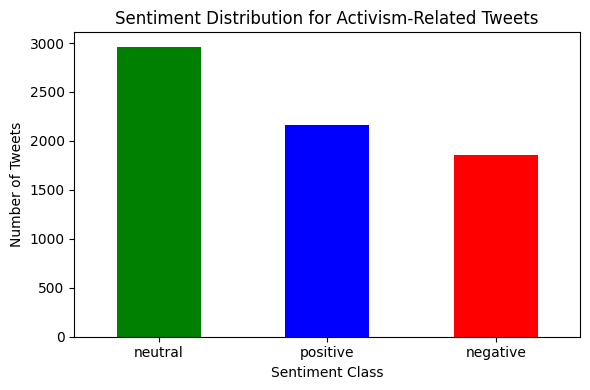

In [51]:
import matplotlib.pyplot as plt

# Plot sentiment distribution for activism-related tweets
plt.figure(figsize=(6, 4))
activism_tweets['sentiment_class'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for Activism-Related Tweets')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [52]:
# Keywords related to COVID-19
covid_keywords = ['covid', 'coronavirus', 'pandemic', 'quarantine', 'lockdown', 'safety measures']

# Function to filter tweets by COVID-related keywords
def filter_tweets_by_covid(keyword_list):
    pattern = '|'.join(keyword_list)  # Create a regex pattern from the list of keywords
    return dataset[dataset['cleaned_text'].str.contains(pattern, case=False, na=False)]

# Filter the dataset for COVID-19 related tweets
covid_tweets = filter_tweets_by_covid(covid_keywords)

# Check sample COVID-19 related tweets
print("Sample COVID-19 Related Tweets:")
print(covid_tweets[['cleaned_text']].head())


Sample COVID-19 Related Tweets:
                                          cleaned_text
53   jon rahm pulls olympics us open champion world...
67   dont catch covid 2 athletes alreadt positive c...
144  turns canoe slalom apropos metaphor pandemic o...
158  dont catch covid 2 athletes alreadt positive c...
184  spains jon rahm olympics positive covid test g...


In [53]:
# Analyze sentiment distribution for COVID-19 related tweets
covid_sentiment_distribution = covid_tweets['sentiment_class'].value_counts(normalize=True) * 100

# Display sentiment distribution for COVID-19 related tweets
print("Sentiment Distribution for COVID-19 Related Tweets:")
print(covid_sentiment_distribution)


Sentiment Distribution for COVID-19 Related Tweets:
sentiment_class
neutral     43.683958
positive    41.642651
negative    14.673391
Name: proportion, dtype: float64


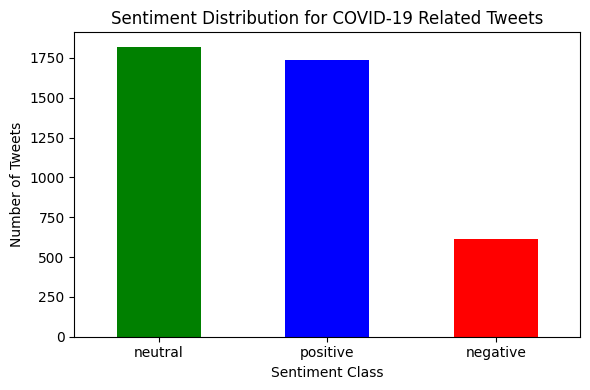

In [54]:
import matplotlib.pyplot as plt

# Plot sentiment distribution for COVID-19 related tweets
plt.figure(figsize=(6, 4))
covid_tweets['sentiment_class'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution for COVID-19 Related Tweets')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
